# Aula 04
## 1) Workflow
Para esse exercício, será necessário carregar alguns dados que já vimos sobre o clima em São Bernardo do Campo (SP):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
c = pd.read_csv(link)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# Seleciona preditores e Y
X = c[['wind_speed', 'maximum_temprature']]
Y = c.humidity

# Holdout
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Treina o modelo e checa erros
reg = LinearRegression().fit(X_train, Y_train)
pred = reg.predict(X_test)
mean_squared_error(Y_test, pred) # MSE

73.10213379861297

### a) Treino
Treine modelos lineares (OLS) usando a combinação de variáveis que você achar melhor.

### b) Métricas
Usando o modelo treinado anterioremente, calcule diferentes métricas de validação.

In [4]:
c.columns

Index(['date', 'country', 'city', 'maximum_temprature', 'minimum_temprature',
       'wind_speed', 'wind_direction', 'amount_of_rain', 'humidity',
       'cloud_coverage', 'pressure'],
      dtype='object')

In [3]:
def regressaoLinear(base, Y_valor, X_valor):
    # Seleciona preditores e Y
    X = base[X_valor]
    Y = base[Y_valor]
    # Holdout
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # Tr   eina o modelo e checa erros
    reg = LinearRegression().fit(X_train, Y_train)
    pred = reg.predict(X_test)
    return reg, mean_absolute_error(Y_test, pred),\
        mean_squared_error(Y_test, pred),\
        np.sqrt(mean_squared_error(Y_test, pred))



In [6]:
regressao_1, mae_1, mse_1, reg_rmse_1  = regressaoLinear(c, ['humidity'],['maximum_temprature', 'minimum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'] )

print("\nRegressão: 1\n MAE: ", mae_1, "MSE: ",mse_1," RMSE:", reg_rmse_1)

regressao_2,  mae_2, mse_2, reg_rmse_2  = regressaoLinear(c, ['humidity'],['wind_speed', 'amount_of_rain','cloud_coverage',
 'pressure'] )

print("\nRegressão: 1\n MAE: ", mae_2, "MSE: ",mse_2," RMSE:", reg_rmse_2)

regressao_3,  mae_3, mse_3, reg_rmse_3 = regressaoLinear(c, ['humidity'],['wind_speed', 'amount_of_rain','cloud_coverage'] )

print("\nRegressão: 1\n MAE: ", mae_3, "MSE: ",mse_3," RMSE:", reg_rmse_3)


Regressão: 1
 MAE:  5.728357128389513 MSE:  52.456423534346015  RMSE: 7.24268068703474

Regressão: 1
 MAE:  6.5160966089721315 MSE:  67.65865723505254  RMSE: 8.22548826727341

Regressão: 1
 MAE:  6.503024658019377 MSE:  67.65031295341555  RMSE: 8.224981030580894


### c) Função
Crie uma função que rode esse workflow inteiro e retorne apenas uma métrica de validação. Rode essa função 100 vezes e reporte os resultados (como quiser, com gráfico ou outros).

In [7]:
def rodarN(n,base,Y,X):
    rmse_regs = []
    for i in range(0,n):
        regressao_1, mae_1, mse_1, reg_rmse = regressaoLinear(base,Y,X)
        rmse_regs.append(reg_rmse)
    g = sns.histplot(x=rmse_regs)
    g.set(xlabel='RMSE')
        


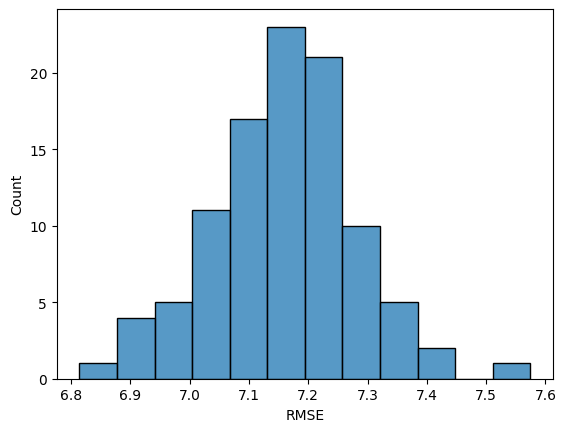

In [8]:
rodarN(100,c,['humidity'],['maximum_temprature', 'minimum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'])

### d) Ajuste
Usando a função anterior, teste diferentes combinações de variáveis no modelo para achar um que tenha uma boa performance.



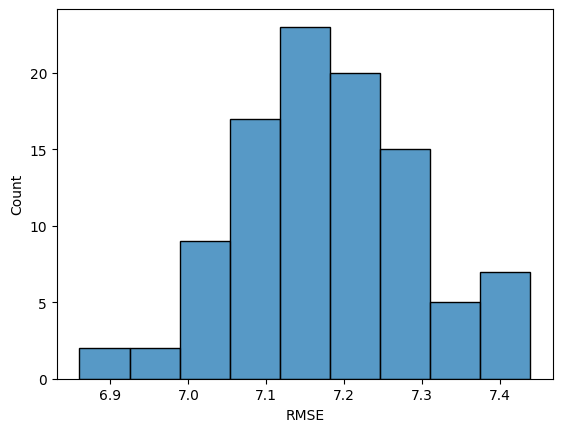

In [9]:
rodarN(100,c,['humidity'],['maximum_temprature', 'minimum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'])

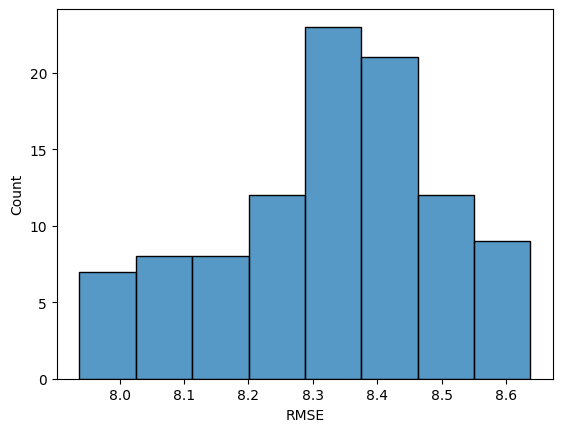

In [10]:
rodarN(100,c,['humidity'],['wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'])

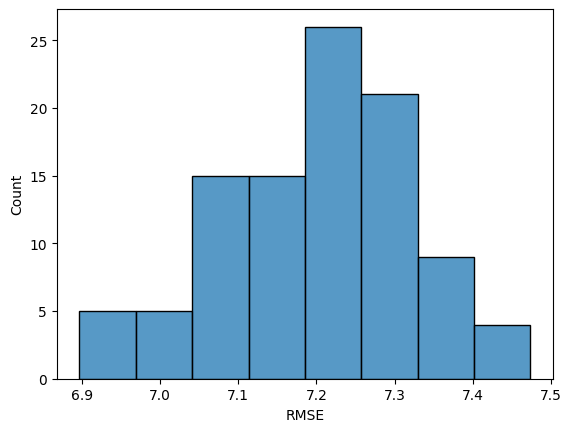

In [11]:
rodarN(100,c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'])

### 2) Regularização
Para esse exercício, serão necessários os seguintes algoritmos:

#### a) Regularização
Usando a mesma base de dados, adapte seu workflow anterior para, em vez de usar regressão linear, estimar modelos LASSO e Ridge.

#### b) Funções
Crie uma função para estimar LASSO e Ridge e compare os resultados de 100 execuções.

In [12]:
def regressaoE(base, Y_valor, X_valor, pteste=0.3, funcao="linear", alpha_val=0.1, normaliza_dummy =1 ):
    # Seleciona preditores e Y
    X = base[X_valor]
    Y = base[Y_valor]

    X_categorico = X.select_dtypes(include= 'object')
    onehot = OneHotEncoder(sparse = False, drop = 'first')
    #nem sempre precisa normalizar

        
    if (normaliza_dummy == 1):
        X_binario = onehot.fit_transform(X_categorico)        
    elif (len(X_categorico.columns) != 0):
        X_binario = pd.get_dummies(X_categorico)
        
    X_numerico = base.select_dtypes(exclude = 'object')
    minmax = MinMaxScaler()
    X_numerico = minmax.fit_transform(X_numerico)
    if (len(X_categorico.columns) != 0):
        X = np.append(X_numerico, X_binario, axis = 1)
    else:
        X = X_numerico

    # Holdout
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=pteste)

    # Tr   eina o modelo e checa erros
    if funcao == "linear": 
        reg = LinearRegression()
    elif funcao == "lasso": 
        reg= Lasso(alpha=alpha_val)
    elif funcao == "ridge": 
        reg= Ridge(alpha=alpha_val)
    
    reg.fit(X_train, Y_train)

    pred = reg.predict(X_test)
    return reg, mean_absolute_error(Y_test, pred),\
        mean_squared_error(Y_test, pred),\
        np.sqrt(mean_squared_error(Y_test, pred))

In [13]:
print(regressaoE(c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="linear"))
print(regressaoE(c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="lasso"))

       
print(regressaoE(c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="ridge"))
print(regressaoE(c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],
       funcao="ridge",
       normaliza_dummy=0))

print(regressaoE(c,['humidity'],['maximum_temprature', 'wind_direction',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="ridge"))
print(regressaoE(c,['humidity'],['maximum_temprature', 'wind_direction',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],
       funcao="ridge",
       normaliza_dummy=0))

print(regressaoE(c,['humidity'],['maximum_temprature', 'wind_direction',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="ridge"))
print(regressaoE(c,['humidity'],['maximum_temprature', 'wind_direction',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],
       funcao="ridge",
       normaliza_dummy=0))
       

(LinearRegression(), 7.068862932147653e-14, 5.131635773068716e-27, 7.163543657344956e-14)
(Lasso(alpha=0.1), 0.5143067741909156, 0.43319378936233754, 0.6581745888154127)
(Ridge(alpha=0.1), 0.016988414965636675, 0.0004541829656416168, 0.02131156882168971)
(Ridge(alpha=0.1), 0.017176622868754557, 0.00047874211253217714, 0.021880176245455088)
(Ridge(alpha=0.1), 0.01842636266604017, 0.0005463257874592667, 0.023373613059586375)
(Ridge(alpha=0.1), 0.01692869616974183, 0.00045982039212740704, 0.021443423050609412)
(Ridge(alpha=0.1), 0.019369717709771448, 0.0005797132054852432, 0.02407723417432416)
(Ridge(alpha=0.1), 0.019330675755620495, 0.0005975326223758247, 0.02444448040715582)


In [14]:
def rodarNE(n,base, Y_valor, X_valor, pteste=0.3, funcao="linear", alpha_val=0.1, normaliza_dummy=1):
    rmse_regs = []
    for i in range(0,n):
        regressao_1, mae_1, mse_1, reg_rmse = regressaoE(base, Y_valor, X_valor, pteste, funcao,alpha_val,normaliza_dummy)
        rmse_regs.append(reg_rmse)
    g = sns.histplot(x=rmse_regs)
    texto = str(regressao_1) + " - RMSE"
    g.set(xlabel=texto)

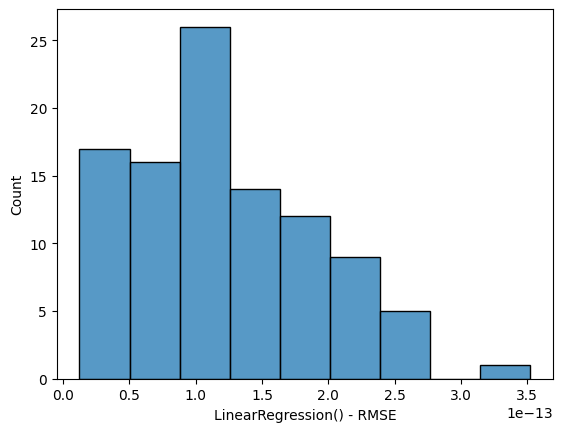

In [15]:
rodarNE(100,c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="linear")

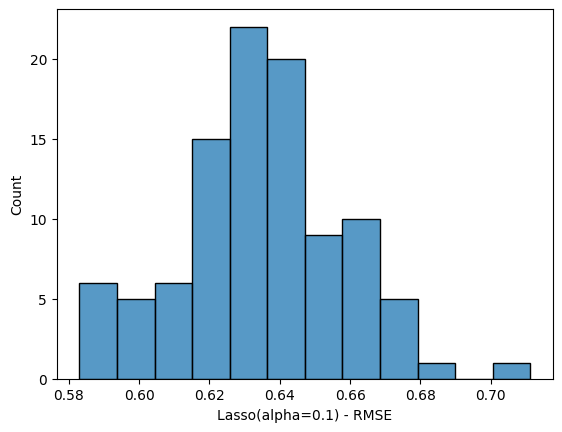

In [16]:
rodarNE(100,c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="lasso")

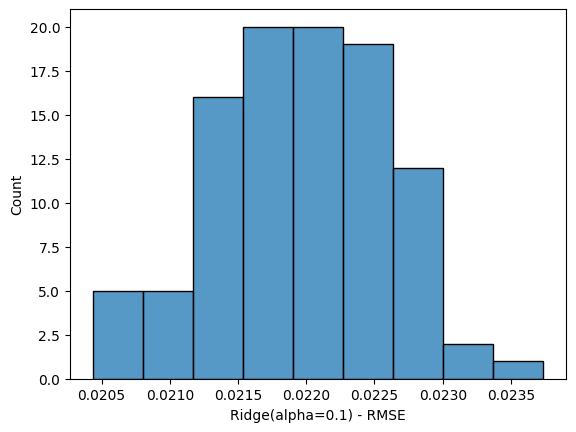

In [17]:
rodarNE(100,c,['humidity'],['maximum_temprature',
       'wind_speed', 'amount_of_rain','cloud_coverage', 'pressure'],funcao="ridge")

### 3) Regulação e transformação de preditores
Para este exercício, será necessário carregar os seguintes dados com resultados do segundo turno de 2018 por município no Brasil:

#### a) Transformações básicas
Crie uma nova variável que indique o percentual de votos válidos de Bolsonaro (dica: basta dividir votos_bolsonaro_2t_2018 por votos_validos_2t_2018)

#### b) Exploração
Crie alguns gráficos pra explorar a relação entre a votação de Bolsonaro e algumas das variáveis do banco (faça como quiser, e quantos gráficos quiser).

#### d) Transformações
Transforme a variável pib_total para que ela fique estandardizada (vale ser criativo e explorar outras variáveis do banco).

In [4]:
link = 'https://raw.githubusercontent.com/FLS-6497/datasets/main/aula4/eleicoes_mun_2018.csv'
elei18 = pd.read_csv(link, sep=';')

In [5]:
elei18.head()
elei18['pib_total_numerico'] = elei18['pib_total'].str.replace(',','.').astype(float)
elei18['voto_percentual'] = elei18['votos_bolsonaro_2t_2018']/elei18['votos_validos_2t_2018']
elei18['pib_per_votantes'] = elei18['pib_total_numerico']/elei18['aptos_2018']


In [38]:
elei18_grafico = elei18.loc[:,['capital','votos_bolsonaro_2t_2018',\
    'votos_validos_2t_2018','amazonia_legal','semiarido','regiao',\
    'voto_percentual','pib_per_votantes'
        ]]


#elei18_grafico['pib_total_numerico2'] = pd.to_numeric(elei18['pib_total_numerico'], errors='ignore')

elei18_grafico.head()
#elei18_grafico['pib_total_numerico'] = elei18['pib_total_numerico'].replace(',','.')

#elei18_grafico.to_excel('oi.xlsx')

,capital,votos_bolsonaro_2t_2018,votos_validos_2t_2018,amazonia_legal,semiarido,regiao,voto_percentual,pib_per_votantes
0,0,3320,5649,1,0,Norte,0.587715,24.114054
1,0,12838,18682,1,0,Norte,0.687186,27.191221
2,1,166145,240992,1,0,Norte,0.689421,50.741871
3,0,8634,11429,1,0,Norte,0.755447,27.237343
4,0,11682,15099,1,0,Norte,0.773694,28.180575


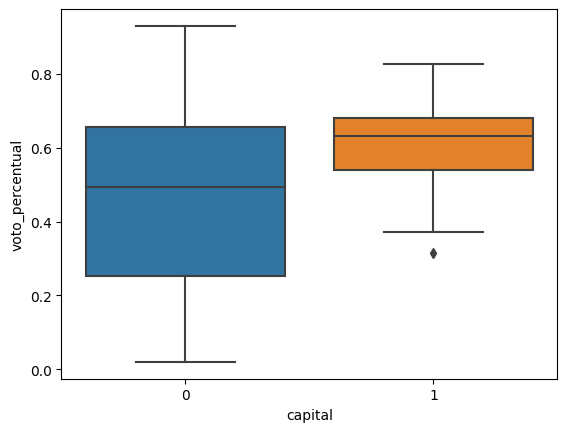

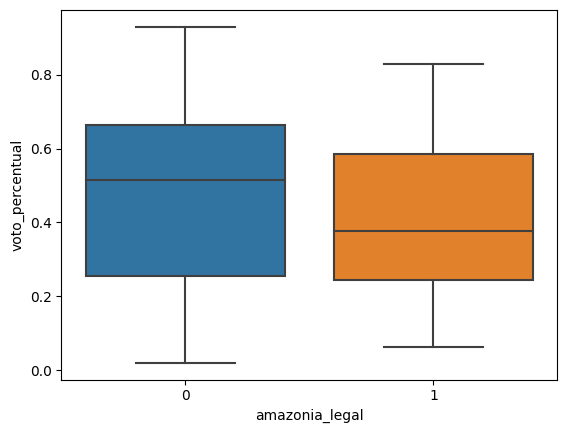

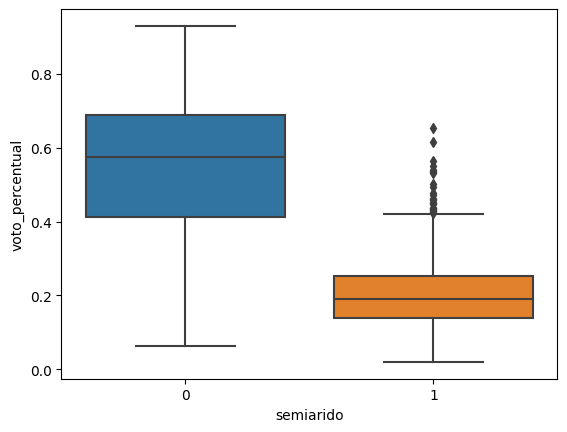

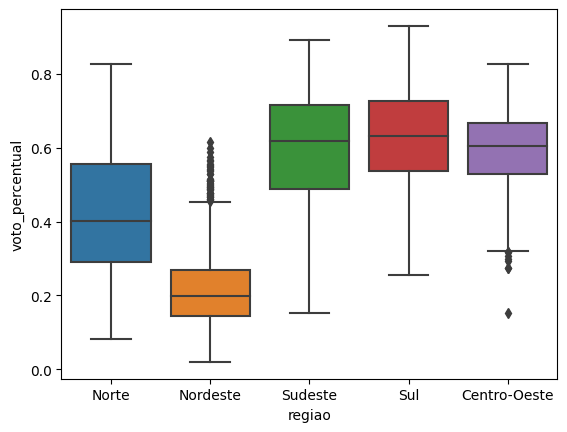

In [39]:
vars= ['capital', 'amazonia_legal','semiarido','regiao']
for var in vars:
    g = sns.boxplot(x=var,y='voto_percentual',data=elei18_grafico)
    plt.show()

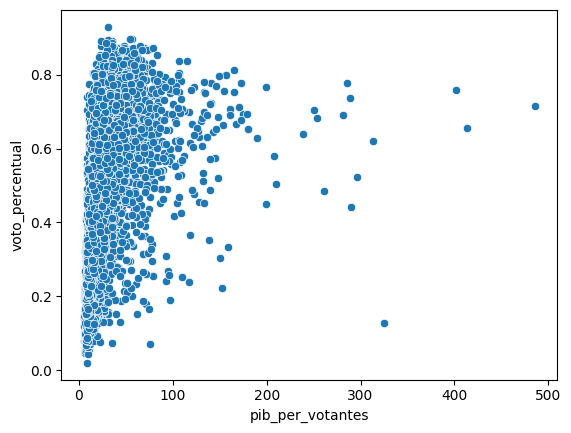

In [40]:
vars= ['pib_per_votantes']
for var in vars:
    g = sns.scatterplot(x=var,y='voto_percentual',data=elei18_grafico)
    plt.show()

#### c) Modelos
Rode modelos lineares, com e sem regularização, para tentar predizer a votação de Bolsonaro nos municípios usando variáveis como regiao, semiarido, capital, pib_total.

In [61]:
elei18.dtypes

Unnamed: 0                   int64
regiao                      object
sigla_uf                    object
id_municipio                 int64
municipio                   object
votos_validos_2t_2018        int64
capital                      int64
votos_bolsonaro_2t_2018      int64
aptos_2018                   int64
amazonia_legal               int64
semiarido                    int64
pib_total                   object
pib_total_numerico         float64
voto_percentual            float64
pib_per_votante            float64
pib_per_votantes           float64
dtype: object

In [6]:
def regressaoE2(base, Y_valor, X_valor, pteste=0.3, funcao="linear", alpha_val=0.1, normaliza_dummy =1 ):
    # Seleciona preditores e Y
    X = base[X_valor]
    Y = base[Y_valor]

    X_categorico = X.select_dtypes(include= 'object')
    onehot = OneHotEncoder(sparse = False, drop = 'first')
    #nem sempre precisa normalizar

        
    if (normaliza_dummy == 1):
        X_binario = onehot.fit_transform(X_categorico)   
        print(X_binario)     
    elif (len(X_categorico.columns) != 0):
        X_binario = pd.get_dummies(X_categorico)
        
    X_numerico = base.select_dtypes(exclude = 'object')
    minmax = MinMaxScaler()
    X_numerico = minmax.fit_transform(X_numerico)
    if (len(X_categorico.columns) != 0):
        print("nuemrico")
        X = np.append(X_numerico, X_binario, axis = 1)
    else:
        X = X_numerico

    # Holdout
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=pteste)

    # Tr   eina o modelo e checa erros
    if funcao == "linear": 
        reg = LinearRegression()
    elif funcao == "lasso": 
        reg= Lasso(alpha=alpha_val)
    elif funcao == "ridge": 
        reg= Ridge(alpha=alpha_val)
    
    reg.fit(X_train, Y_train)

    pred = reg.predict(X_test)
    return reg, mean_absolute_error(Y_test, pred),\
        mean_squared_error(Y_test, pred),\
        np.sqrt(mean_squared_error(Y_test, pred))

In [11]:
print(regressaoE2(elei18,['voto_percentual'],['pib_per_votantes'],
       funcao="linear",
       normaliza_dummy=0))



(LinearRegression(), 1.1512085918493124e-16, 1.9849324391077885e-32, 1.408876303693049e-16)


In [52]:
print(regressaoE(elei18,['voto_percentual'],['semiarido', 'pib_per_votantes',
       'regiao', 'amazonia_legal'],
       funcao="ridge",
       normaliza_dummy=0))

print(regressaoE(elei18,['voto_percentual'],['semiarido', 'pib_per_votantes',
       'regiao', 'amazonia_legal'],
       funcao="ridge",
       normaliza_dummy=1))

print(regressaoE(elei18,['voto_percentual'],['semiarido', 
       'regiao', 'amazonia_legal'],
       funcao="ridge",
       normaliza_dummy=0))

print(regressaoE(elei18,['voto_percentual'],['semiarido', 
       'regiao', 'amazonia_legal'],
       funcao="ridge",
       normaliza_dummy=1))

print(regressaoE(elei18,['voto_percentual'],['pib_per_votantes'],
       funcao="lasso",
       normaliza_dummy=0))
print(regressaoE(elei18,['voto_percentual'],['pib_per_votantes'],
       funcao="ridge",
       normaliza_dummy=0, alpha_val=1))
print(regressaoE(elei18,['voto_percentual'],['pib_per_votantes'],
       funcao="ridge",
       normaliza_dummy=0, alpha_val=0.1))
       


(Ridge(alpha=0.1), 0.0005107754204646838, 4.513152756620163e-07, 0.0006718000265421373)
(Ridge(alpha=0.1), 0.0004991842922980069, 4.5171995789456285e-07, 0.000672101151534918)
(Ridge(alpha=0.1), 0.000507871640482475, 4.6270383306448225e-07, 0.0006802233699781876)
(Ridge(alpha=0.1), 0.0005111776228603586, 4.7182603249725605e-07, 0.0006868959400791768)
(Lasso(alpha=0.1), 0.1969178164685752, 0.04946034240747269, 0.2223968129436047)
(Ridge(alpha=1), 0.002987650510289496, 1.4193029983679039e-05, 0.003767363797628129)
(Ridge(alpha=0.1), 0.00038605896054790244, 2.3171868901270636e-07, 0.000481371674501841)


In [41]:
elei18.columns

Index(['Unnamed: 0', 'regiao', 'sigla_uf', 'id_municipio', 'municipio',
       'votos_validos_2t_2018', 'capital', 'votos_bolsonaro_2t_2018',
       'aptos_2018', 'amazonia_legal', 'semiarido', 'pib_total',
       'pib_total_numerico', 'voto_percentual', 'pib_per_votante',
       'pib_per_votantes'],
      dtype='object')